Most of the core algorithmic stuff is packaged into _SDOptimizer_. We instantiate an object and then load in the data from a single smoke source which was obtained from Katie's simulation. This represents the smoke consentation at a point on the wall at a certain time. 

In [1]:
from SDOptimizer import SDOptimizer
DATA_FILE = "exportUSLab.csv"  # Points to the data Katie gave us
SDO = SDOptimizer()
SDO.load_data(DATA_FILE)

What we really want to extract from the data is the minimum time to alarm at any location on the wall. _SDOptimizer.get_time_to_alarm()_ takes the most-recently loaded data and returns this information. The data can be optionally flipped about the x or y axis to provide augmented data for testing, since we only have one smoke source. The last one will be visualized

In [2]:
source1 = SDO.get_time_to_alarm(False, False) # the default value of flip is false, so this is simply included for clarity
source2 = SDO.get_time_to_alarm(True, False) # flip about the x axis

Now, we generate our objective function from this data. This function maps from the locations of all smoke detectors, to the worst-case time to alarm. This is done by finding, for each smoke source, the minimum time to alarm for any detector, and then taking the largest value, representing the worst-case smoke source. 

The behavior of the objective function can be somewhat visualized by fixing the location of _n_ smoke detectors and then sweeping the last one. 

<function SDOptimizer.make_total_lookup_function.<locals>.ret_func at 0x00000233600BD8B8>
(2500, 2)


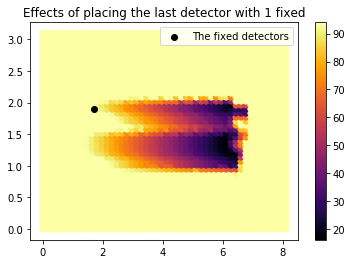

In [3]:
smoke_sources = [source1, source2]
fixed_detector = [1.70799994, 1.89999998]
bounds =  [0, 8.1, 0, 3.1]

total_objective_func = SDO.make_total_lookup_function(smoke_sources)
SDO.plot_sweep([source1, source2], fixed_detector, bounds)

In [4]:
initialization = [1.70799994, 1.89999998, 6.83200002, 1.89999998]
print(SDO.optimize(smoke_sources, bounds, initialization))

The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
     fun: 10.113013160871343
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 38
  status: 1
 success: True
       x: array([1.70803573, 1.90007941, 6.832049  , 1.90000312])


The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
     fun: 17.822095993421737
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 559
  status: 1
 success: True
       x: array([2.20425281, 1.93746561, 6.73272703, 1.90840889])


<Figure size 432x288 with 0 Axes>

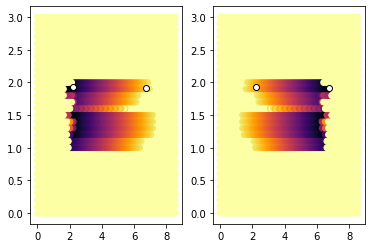

In [5]:
initialization = [1.6, 2, 6.83200002, 1.89999998]
result = SDO.optimize(smoke_sources, bounds, initialization)
print(result)
SDO.plot_inputs(smoke_sources, result.x)

<function SDOptimizer.make_total_lookup_function.<locals>.ret_func at 0x00000233635C1F78>
(2500, 2)


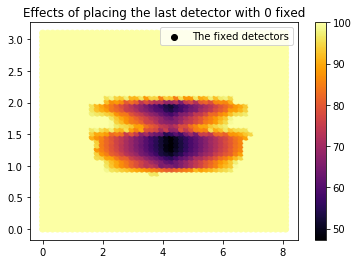

In [6]:
smoke_sources = [source1, source2]
fixed_detector = [] # no detectors
bounds =  [0, 8.1, 0, 3.1]

total_objective_func = SDO.make_total_lookup_function(smoke_sources)
SDO.plot_sweep([source1, source2], fixed_detector, bounds)

The bounds are now [(0, 8.1), (0, 3.1)]
     fun: 47.00124972515347
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 80
  status: 1
 success: True
       x: array([4.26987504, 1.44920194])


<Figure size 432x288 with 0 Axes>

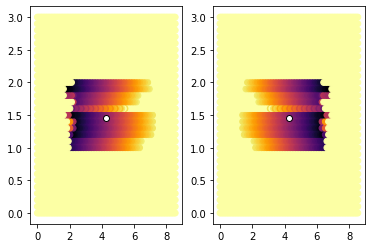

In [7]:
initialization = [1.6, 2,]
result = SDO.optimize(smoke_sources, bounds, initialization)
print(result)
SDO.plot_inputs(smoke_sources, result.x)